# week 3

In [1]:
# Exploratory Data Analysis?- is an analysis approach that identifies general patterns in the data.
#It means analyzing data before modeling to understand its structure, patterns, and problems.
# Purpose:
# Know what’s in your data

# Detect missing values, outliers, duplicates

# Find relationships between columns

# Prepare for modeling

In [2]:
# Types of Exploratory Data Analysis
# 1. Univariate Analysis
# 2. Bivariate Analysis
# 3. Multivariate Analysis

In [3]:
# Week 3 Work: EDA + Feature Engineering

In [12]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
 # Step 2: Load Dataset
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [16]:
# Step 3: Basic Info
print(df.shape)          #Rows, Columns #This function is used to understand the number of rows (observations) and columns (features) in the dataset.
print(df.info())        # Data types, Nulls #Shows basic info about the DataFrame:#rows, columns, non-null values, data types, and memory use.
print(df.describe())    # Returns statistical summary of numerical columns:count, mean, std, min, max, and quartiles (25%, 50%, 75%).
print(df.columns.tolist())  # Returns all column names as a Python list.
  


(3755, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691

In [7]:
 # Step 4: Missing & Duplicates
print(df.isnull().sum())  # Missing values # #Shows total missing (NaN) values in each column.
print(df.duplicated().sum()) # Duplicate rows #Counts how many duplicate rows are present in the DataFrame 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
1171


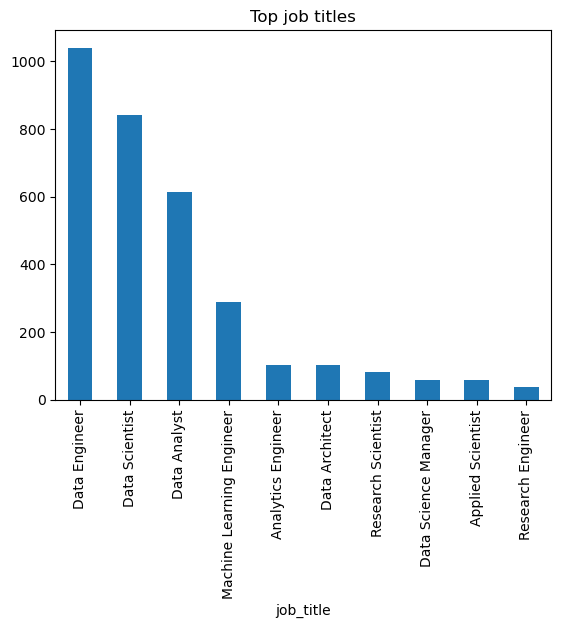

In [8]:
# Step 5: Univariate Analysis #It is the analysis of one variable at a time to understand its distribution, central tendency, and spread.
# Key Tools:
# Numerical Data: mean, median, mode, std, histogram, boxplot
 #Categorical Data: value_counts(), barplot
# 1. Bar Plot: Job Title Counts
df['job_title'].value_counts().head(10).plot(kind='bar') #.head(10)  Shows the first 10 rows of the DataFrame.
plt.title("Top job titles")
plt.show()

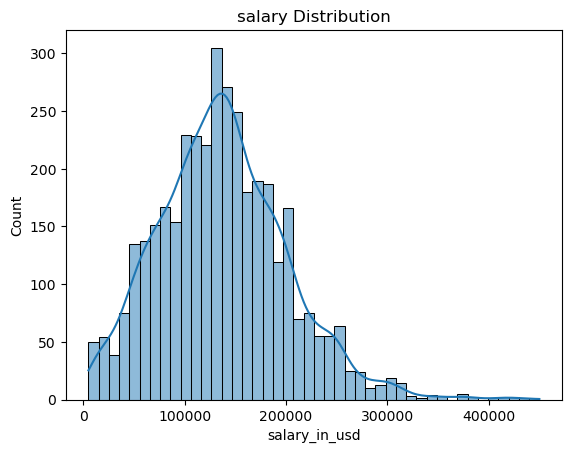

In [9]:
# 2. Histogram with (Kernel Density Estimate) #KDE is a smooth curve that estimates the probability density of a continuous variable.
sns.histplot(df['salary_in_usd'], kde=True) # .histplot -A Seaborn function that plots a histogram (with optional KDE)
plt.title("salary Distribution")             # histogram   A graph that shows the frequency of values in intervals (bins) for a numerical variable.
plt.show()

C:\Users\Acer Aspire 3\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Acer Aspire 3\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Acer Aspire 3\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Acer Aspire 3\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Acer Aspire 3\anaconda3\Lib\site-packages\seaborn\categorical.p

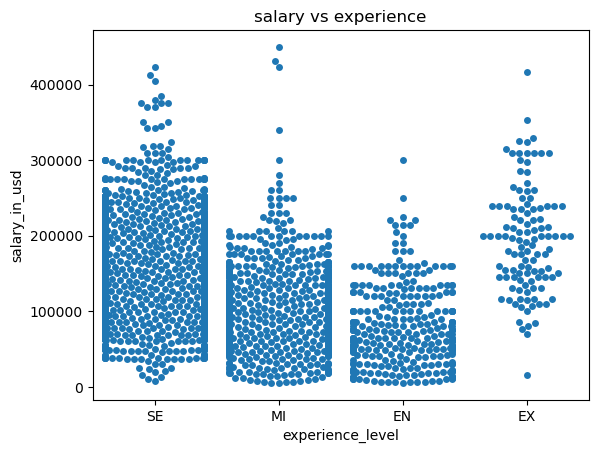

In [10]:
# 3. Swarm Plot: Salary vs Experience Level
sns.swarmplot(x='experience_level',y='salary_in_usd', data=df) #swarm plot -A categorical scatter plot that shows all data points while avoiding overlap.
plt.title("salary vs experience")
plt.show()

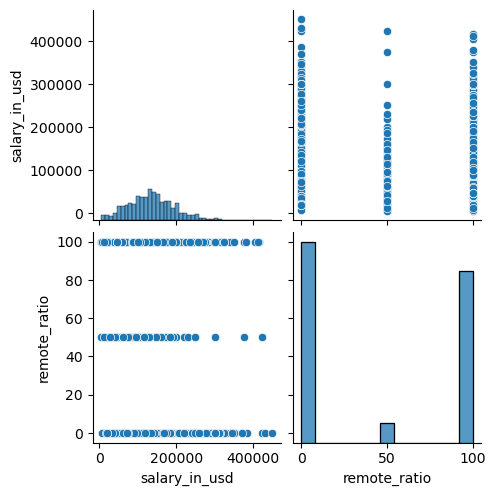

In [11]:
 # Step 6: Bivariate Analysis -It is the analysis of two variables to find relationships, patterns, or associations between them
#.how changes in one variable might affect another.
#Types:
#Numerical vs Numerical: scatter plot, correlation
#Categorical vs Numerical: boxplot, groupby mean
#Categorical vs Categorical: crosstab, countplot
 # 1. Pair Plot ---- used to plot a pairwise relationship btw the numeric variables in a dataset.
sns.pairplot(df[['salary_in_usd', 'remote_ratio']])
plt.show()

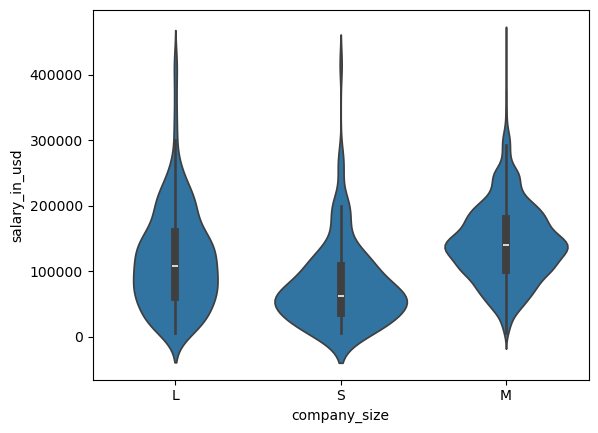

In [12]:
# 2. Violin Plot: Salary by Company Size #violin plot--A combination of boxplot and KDE — shows distribution, density, and summary stats of a 
#numerical variable by category.
sns.violinplot(x='company_size', y='salary_in_usd',data=df)
plt.show()

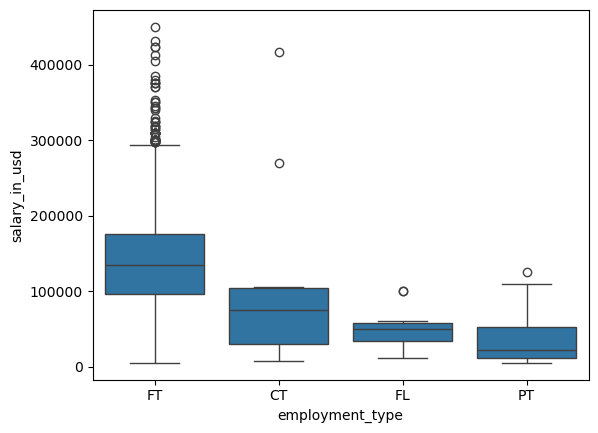

In [13]:
 # 3. Box Plot: Salary by Employment Type #box plot--A plot that shows the summary of distribution using 5-number statistics:
# Min, Q1, Median, Q3, Max (and outliers). outliers--Outliers are data points that are very different (too high or too low) from the rest of the data.
sns.boxplot(x='employment_type',y='salary_in_usd',data=df)
plt.show()

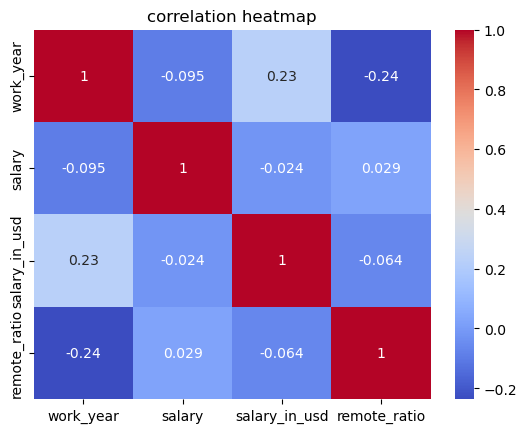

In [19]:
# Step 7: Multivariate Analysis ---interactions between three or more variables in a dataset at the same time.
#This approach focuses to identify complex patterns, relationships and interactions which provides understanding of
#how multiple variables collectively behave and influence each other.
# 1. Correlation Matrix-----A table showing correlation coefficients between numeric variables — values range from -1 to 1.
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# plot heatmap  A heat map is a 2D representation of data in which various values are represented by colors.
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') #annotation" — used in Seaborn plots (like heatmaps) to display data values on the plot.
plt.title("correlation heatmap")
plt.show()

In [26]:
 # Step 8: Feature Engineering #It is the process of creating, transforming, or selecting features (columns) to improve model performance.
 # 1. Encode Categorical Variables-It means converting text categories into numbers so that machine learning models can use them.
# because ML models can't handle strings — they need numeric input
df['experience_level'] = df['experience_level'].astype('category').cat.codes # astype-Used to change the data type of a column in a DataFrame.
df['company_size'] = df['company_size'].astype('category').cat.codes
print(df[['experience_level', 'company_size']].head())

   experience_level  company_size
0                 3             0
1                 2             2
2                 2             2
3                 3             1
4                 3             1


In [25]:
 # 2. Create New Feature: Salary per Remote Ratio
df['salary_per_remote'] = df['salary_in_usd'] / (df['remote_ratio'] + 1)
print(df[['salary_in_usd', 'remote_ratio', 'salary_per_remote']].head())

   salary_in_usd  remote_ratio  salary_per_remote
0          85847           100         849.970297
1          30000           100         297.029703
2          25500           100         252.475248
3         175000           100        1732.673267
4         120000           100        1188.118812


In [31]:
 # 3. Normalize Salary --To normalize the salary_in_usd column (scale it between 0 and 1) using MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler #sklearn-Scikit-learn, it's a popular Python library used for machine learning.
scaler=MinMaxScaler() # MinMaxScaler--A tool from sklearn.preprocessing that scales (normalizes) data to a range of 0 to 1.
df['salary_norm']=scaler.fit_transform(df[['salary_in_usd']])
print(df[['salary_in_usd', 'salary_norm']].head())


   salary_in_usd  salary_norm
0          85847     0.181436
1          30000     0.055900
2          25500     0.045784
3         175000     0.381839
4         120000     0.258207


In [32]:
########  # Communication of Insights (For Clients)-- It means explaining your data findings to clients in a clear, simple, and useful way.
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head()

job_title
Data Science Tech Lead      375000.000
Cloud Data Architect        250000.000
Data Lead                   212500.000
Data Analytics Lead         211254.500
Principal Data Scientist    198171.125
Name: salary_in_usd, dtype: float64

<Axes: xlabel='job_title'>

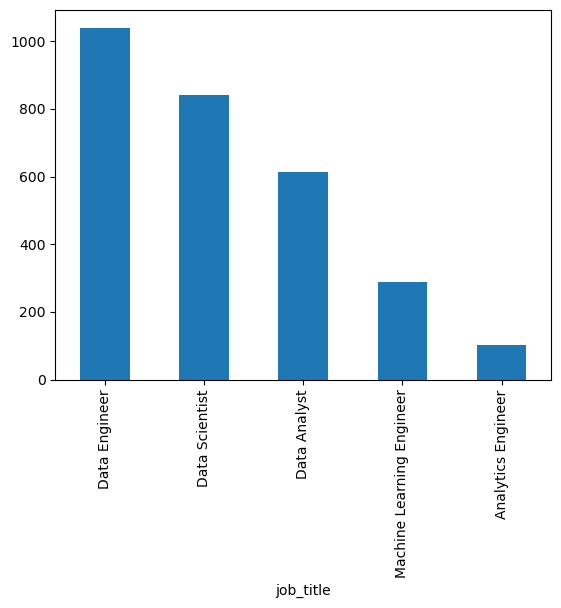

In [33]:
######### “Roles like X and Y have the highest average salaries.”

#And explain with bar plots like:


df['job_title'].value_counts().head(5).plot(kind='bar')